### Deep Learning Lab -- Forward Propagate A Dataset Built With Images

In this lab you'll forward propagate using a dataset that contains images of handwritten digits.  

Your neural network will have the following qualities to it:

 - An input layer
 - two hidden layers, one with 5 neurons, and one with 10
 - an output layer that has 10 predicted classes of outcomes

#### Step 1:  Load in the MNIST Dataset

In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
with open('./X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
    
with open('./y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

#### Step 2:  Check the shape of your training images, and look at the first item.

In [4]:
X_train.shape

(60000, 28, 28)

In [11]:
y_train[0]

5

#### Step 3).  Try using the imshow() method in matplotlib to see what the first image looks like

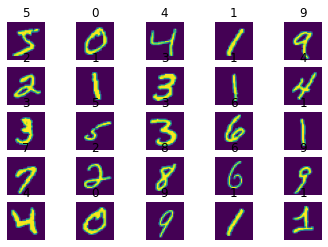

<Figure size 864x864 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5,5)
plt.figure(figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set_title(y_train[i])
    ax.axis('off')

#### Try looking at a few more to see what they look like.  Also look at the training labels to see their corresponding identity.

**How many unique labels are there?**

In [21]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Step 4).  To make this a little bit easier, let's just use the first 100 images of the dataset, so computation doesn't take too long.

In [17]:
X_100 = X_train[:100]
y_100 = y_train[:100]

#### Standardize the training data by dividing it by 255

In [18]:
X_100 = X_100 / 255

**Any idea why we'd do this instead of traditional standardization?**

#### Step 5).  Reshape your data so that it's two dimensional:  100X784

In [23]:
X_100 = X_100.reshape(100, 784)

#### Step 6). Initialize a hidden unit with 10 neurons, as well as a separate set of variables that represent a coefficient for each column in your hidden layer.

In [24]:
# hidden layer with 10 neaurons (784, 10)
hidden_weights    = np.random.normal(0, 0.1, size=(784, 10))
# bias coefs 
hidden_intercepts = np.random.normal(0, 0.1, size=10)

#### Step 7).  Use the dot() method to matrix multiply your input with your layer of hidden weights to create your hidden layer.  Apply the Relu activation function afterwards.

In [25]:
X_hidden = X_100.dot(hidden_weights) + hidden_intercepts
# activate the neurons by passing the an activation function of np.maximum
X_hidden = np.maximum(0, X_hidden)

In [26]:
X_hidden.shape

(100, 10)

**check:** The shape of your output should be 100 x 10.

#### Step 8:  Initialize another hidden layer with 5 neurons, with the appropriate number of intercept terms.

In [27]:
hidden_weights2 = np.random.normal(0, 0.1, size=(10, 5))
hidden_intercepts2 = np.random.normal(0, 0.1, size=(5))

#### Step 9:  Matrix multiply the output from your last layer, and activate it with ReLu.

In [28]:
X_hidden2 = X_hidden.dot(hidden_weights2) + hidden_intercepts2
# activate the neurons in the second layer by passing in an activation func of np.maximum
X_hidden2 = np.maximum(0, X_hidden2)

In [30]:
X_hidden2.shape

(100, 5)

#### Step 10:  Create Your Output Layer To Accommodate Each Unique Value in y.  No intercept terms.

In [37]:
output_layer = np.random.normal(0, 0.1, size=(5,10))

#### Step 11:  Matrix multiply your last hidden layer with your output layer, and apply the sigmoid function

In [38]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [39]:
X_output = X_hidden2.dot(output_layer)

In [41]:
X_output = sigmoid(X_output)

#### Step 12:  Create your prediction by choosing the column in your output layer with the highest overall value.

In [46]:
X_output[0]

array([0.49463386, 0.49703601, 0.51440935, 0.50103382, 0.49443438,
       0.49357692, 0.50450802, 0.511629  , 0.50646698, 0.50229803])

In [45]:
np.max(X_output[:3], axis=1)

array([0.51440935, 0.5036105 , 0.5135214 ])

In [49]:
predictions = np.argmax(X_output, axis=1)

#### What Was The Accuracy After Your First Round of Computation?

In [50]:
np.mean(y_train[:100] == predictions)

0.05

#### Bonus:  Create Your Own Functions Called `forward` and `predict` that codify what you did in this lab, where you can specify how many neurons to use for each hidden layer, and make a corresponding prediction.

In [54]:
def forward_prop(X, y, layer1=10, layer2=5):
    # layer 1 dims
    l1rows = X.shape[1]
    l1cols = layer1
    
    # create layer 2 weights and biases
    l1_weights = np.random.normal(0, 0.1, size=(l1rows, l1cols))
    l1_biases = np.random.normal(0, 0.1, size=l1cols)
    
    hidden1 = X.dot(l1_weights) + l1_biases
    hidden1 = np.maximum(0, hidden1)
    
    # layer 2 dims
    l2cols = layer2
    
    l2_weights = np.random.normal(0, 0.1, size=(l1cols, l2cols))
    l2_biases = np.random.normal(0, 0.1, size=l2cols)
    
    hidden2 = hidden1.dot(l2_weights) + l2_biases
    hidden2 = np.maximum(0, hidden2)
    
    # output layer dims
    outcols =  len(np.unique(y))
    
    out_weights = np.random.normal(0, 0.1, size=(l2cols, outcols))
    
    output = hidden2.dot(out_weights)
    output = 1 / (1 + np.exp(-output))
    
    return output
    

In [55]:
def predict_digit(X):
    preds = np.argmin(X, axis=1)
    return preds

In [59]:
output = forward_prop(X_100, y_train[:100])

In [60]:
preds = predict_digit(output)

In [61]:
preds

array([4, 4, 4, 4, 4, 4, 4, 4, 8, 7, 4, 7, 4, 4, 8, 4, 8, 4, 4, 4, 4, 4,
       4, 4, 4, 8, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4,
       7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7,
       4, 4, 4, 4, 8, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 8, 4, 4, 4,
       4, 4, 8, 4, 4, 8, 4, 4, 4, 4, 8, 4])